# Author - SAKSHI MANKAR
# The Sparks Foundation: GRIP APRIL 2021
# TASK 2: Prediction using Unsupervised ML
## Problem Statement - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
### Download dataset from :- https://bit.ly/3kXTdox

## Step 1 : Importing the libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 2 : Loading the Dataset

In [25]:
df = pd.read_csv('Iris.csv')

In [26]:
df.head()     #printing first 5 rows of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df.tail()    #printing last 5 rows of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Step 3: Exploratory Data Analysis
#### Let's take a look at our data in detail

In [28]:
df.shape

(150, 6)

In [29]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### There are no null values in our data

In [30]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### These are the various columns(attributes) of Iris dataset

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [32]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### This is descriptive look of our data

In [33]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Step 4:Checking for outliers in the data


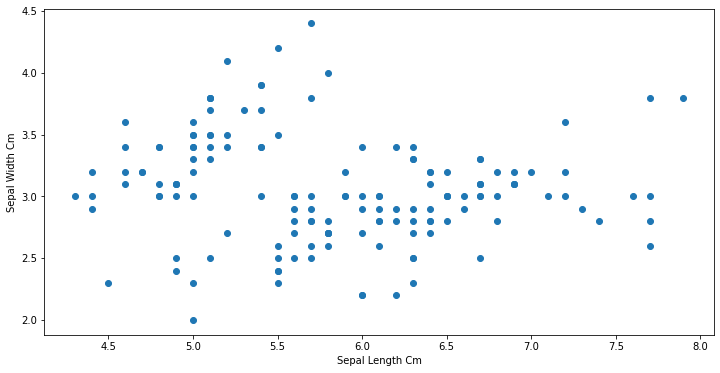

In [34]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['SepalLengthCm'], df['SepalWidthCm'])
ax.set_xlabel('Sepal Length Cm')
ax.set_ylabel('Sepal Width Cm')
plt.show()

### There are some outliers lying outside the average range of values

# Taking help of Boxplot Visualization to spot outliers

<AxesSubplot:xlabel='SepalLengthCm'>

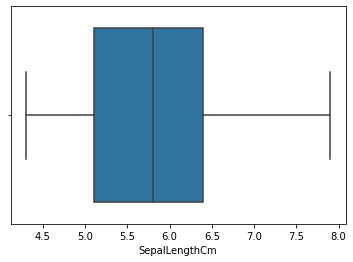

In [35]:
sns.boxplot(data=df,x ='SepalLengthCm')

## There are no outliers in Sepal Length

<AxesSubplot:xlabel='PetalLengthCm'>

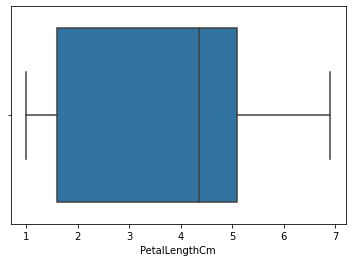

In [36]:
sns.boxplot(data=df,x ='PetalLengthCm')

## There are no outliers in Petal Length

<AxesSubplot:xlabel='PetalWidthCm'>

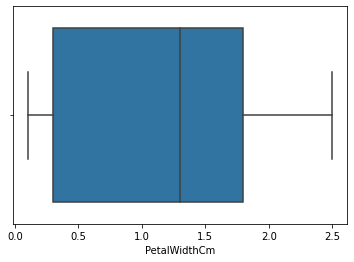

In [37]:
sns.boxplot(data=df,x ='PetalWidthCm')

## There are no outliers in Petal Width

<AxesSubplot:xlabel='SepalWidthCm'>

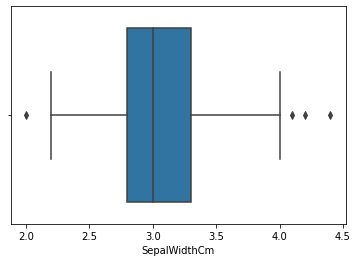

In [38]:
sns.boxplot(data=df,x ='SepalWidthCm')

# There are outliers in Sepal Width

# Step 5: Remvoing the Outliers in Sepal Width with the help of Interquartile Range (IQR)

In [39]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id               74.5
SepalLengthCm     1.3
SepalWidthCm      0.5
PetalLengthCm     3.5
PetalWidthCm      1.5
dtype: float64


### calculating the difference between the 75th and 25th percentiles

In [40]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

(146, 6)


## Here we remove the values which do not fall in IQR range. Hence 4 columns are reduced from our data

In [41]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<AxesSubplot:xlabel='SepalWidthCm'>

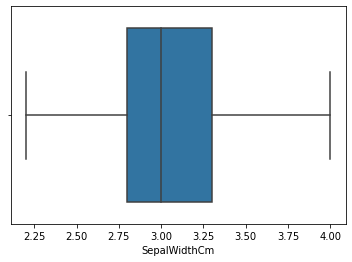

In [42]:
sns.boxplot(data=df,x ='SepalWidthCm')

## Now we can see that the outliers are removed

# Step 6: Data Preprocessing

In [43]:
x = df.iloc[:,1:5].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.

# Step 7: Taking Advantage of Elbow method of KMeans Algorithm to determine the number of Clusters

Text(0, 0.5, 'WCSS')

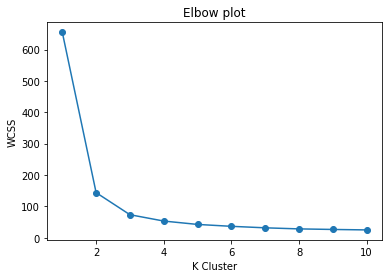

In [44]:
#we start kmeans with elbow methods to get values of K to be tdetermined
wcss = []                   #created list to store all values
for i in range(1,11):
        elbow = KMeans(n_clusters=i, init='k-means++',random_state=42)
        elbow.fit(x)
        wcss.append(elbow.inertia_)                 #inertia is an atribute to calculate kmeans 
x1 = range(1,11)
plt.scatter(x1,wcss)
plt.plot(x1,wcss)
plt.title('Elbow plot')
plt.xlabel('K Cluster')
plt.ylabel('WCSS')

# Observation: From Elbow plot we can conclude that best cluster is 3

# Step 8: Training the Kmeans model and predicting output

In [22]:
cluster = KMeans(n_clusters=5, init='k-means++',random_state=42)
cluster.fit(x)
y_pred = cluster.predict(x)

# Step 9: Visualization of the clusters

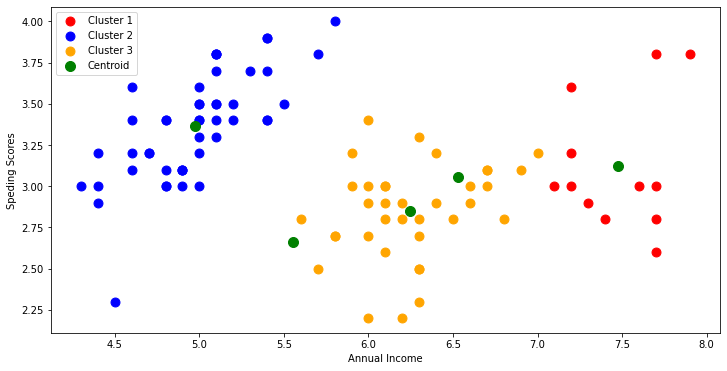

In [23]:
#Plotting the Clusters
plt.figure(figsize=(12,6))
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],c='red',s=80,label='Cluster 1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],c='blue',s=80,label='Cluster 2')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],c='orange',s=80,label='Cluster 3')
#Plotting the centroids of the clusters
plt.scatter(cluster.cluster_centers_[:,0],cluster.cluster_centers_[:,1],c='green',s=100,label='Centroid')
plt.xlabel("Annual Income")
plt.ylabel("Speding Scores")
plt.legend()
plt.show()

# Conclusion: 1)We removed outliers from Sepal Width
# 2)Determined optimum number of clusters to be 3
# 3)Visualized the clusters using Scatter plot

# Thank You!